In [1]:
%pylab notebook
%load_ext autoreload
%autoreload 2
from fitGui import FitGui

Populating the interactive namespace from numpy and matplotlib


In [3]:
def sfgn1(x, nr, phase, amplitude, pos, width):
    '''NR background and one lorenzian peak

    Parameters
    ---------- 
    x : array
        wavenumbers
    nr : Non Resonant background (amplitude)
    phase : Phase of the non resonant background
    amplitude : number
        Amplitude
    pos : number
    width : width of the lorenzian (FWHM)

    Returns
    -------
    array with the same shape as x
    '''

    # Non resonant part
    ChiNR = nr * (cos(phase) + 1j * sin(phase))

    # Resonent part
    ## Prepare parameters
    A = amplitude
    delta = pos - x
    gamma = width / 2
    
    ## The actural lorenzian distribution
    ChiR_i = A * gamma / (delta**2 + gamma**2)
    ChiR_r = A * delta / (delta**2 + gamma**2)
    ChiR = ChiR_r + 1j * ChiR_i

    # The physical Chi
    Chi = ChiR + ChiNR

    # Doing it this way seems to be the fastest
    return square(Chi.real) + square(Chi.imag)

# Gui to Fit-Spectra

<IPython.core.display.Javascript object>


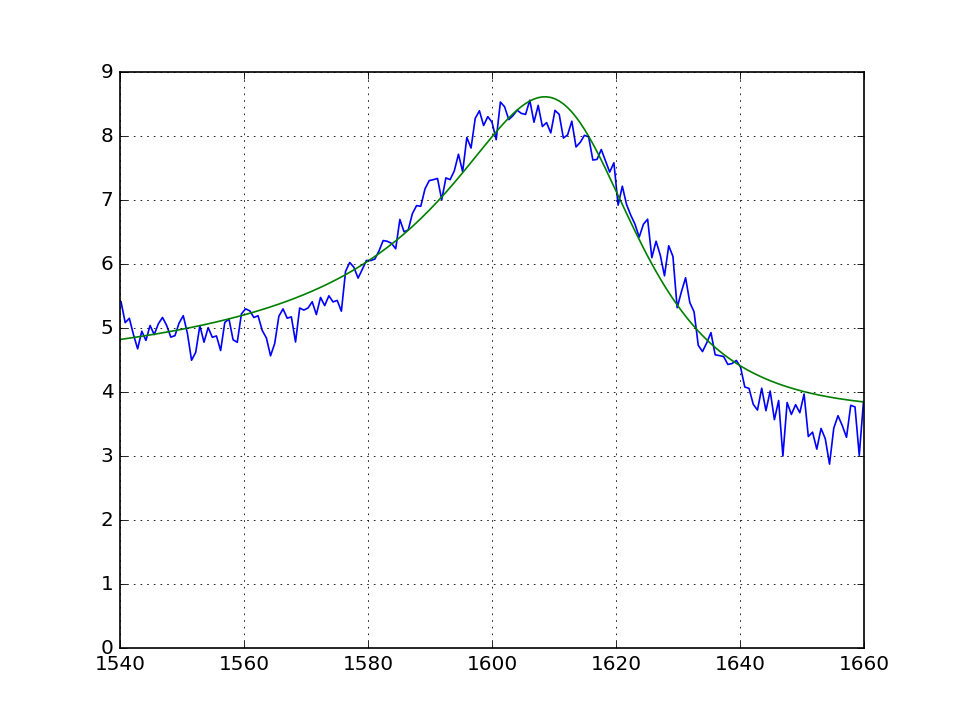

In [4]:
# Load some example data
data = load('./example_peak.npz')

x = data['wavenumber']

# Region of Interest in coordinates of x
xroi = (1540, 1660)
roi = where((x>xroi[0]) & (x<xroi[1]))

# x_data for the fit
x = x[roi]

# y_data for the fit
y = data['normalized'].squeeze()[roi] * 1000 # 1000 so values are ~1. This helps the fitting algorithm

# Uncertaincy of the y_data for the fit
y_err = data['dnormalized'].squeeze()[roi] * 1000

# fit function
fig_func = sfgn1

f = FitGui(x, y, y_err, fig_func)

# Set debug level for further output 0 to 3 are allowed levels
#f._debug = 3

fig, ax = subplots()
f()

# Fit Gui with SFG2D dependencies

In [65]:
import sfg2d
import pandas
import iminuit
import probfit

<IPython.core.display.Javascript object>


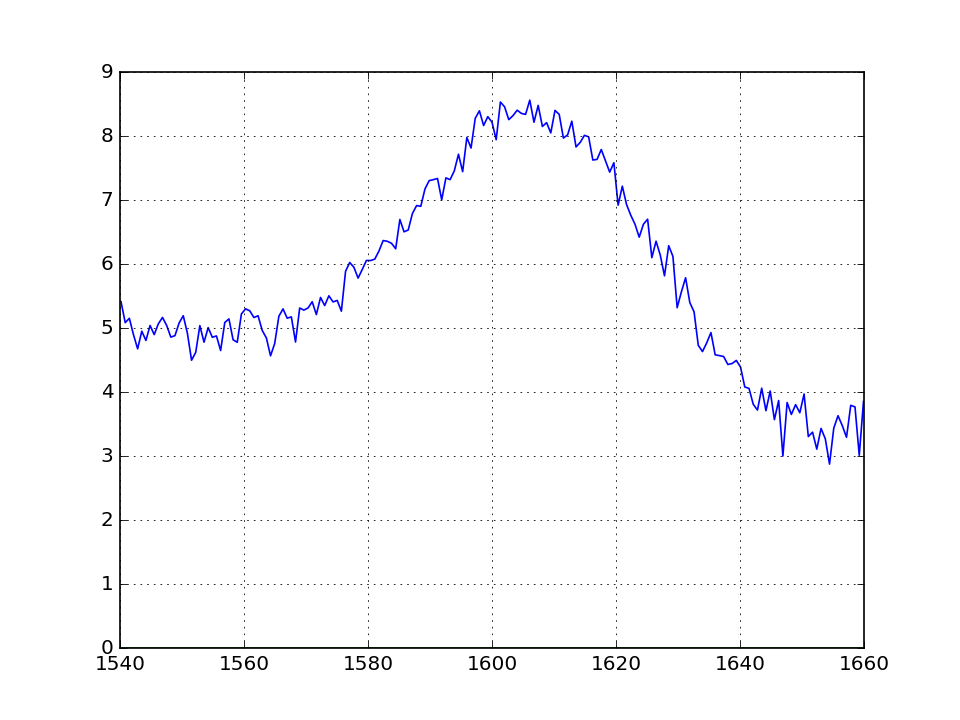

In [47]:
urea8m = sfg2d.io.load_npz_to_Scan('/home/malte/MeasurmentData/Dolly1/2016/10/19/urea_002_v1_avg.npz')
urea7m = sfg2d.io.load_npz_to_Scan('/home/malte/MeasurmentData/Dolly1/2016/10/20/urea_002_03_avg.npz')
urea6m = sfg2d.io.load_npz_to_Scan('/home/malte/MeasurmentData/Dolly1/2016/10/20/urea_002_02_avg.npz')
urea4m = sfg2d.io.load_npz_to_Scan('/home/malte/MeasurmentData/Dolly1/2016/10/19/urea_002_01_v1_avg.npz')

data = urea8m 

# Region of Interest in coordinates of x
roi = slice(1540, 1660)

# x_data for the fit
x = data.df['normalized'][roi].index.get_values()

# y_data for the fit
y = data.df['normalized'][roi].get_values() * 1000

# Uncertaincy of the y_data for the fit
y_err = data.df['dnormalized'][roi].get_values() * 1000

# fit function
fig_func = sfg2d.utils.static.sfgn1

f = FitGui(x, y, y_err, fig_func)

# Set debug level for further output 0 to 3 are allowed levels
#f._debug = 3

fig, ax = subplots()
f()

In [67]:
urea8m = sfg2d.io.load_npz_to_Scan('/home/malte/MeasurmentData/Dolly1/2016/10/19/urea_002_v1_avg.npz')
urea7m = sfg2d.io.load_npz_to_Scan('/home/malte/MeasurmentData/Dolly1/2016/10/20/urea_002_03_avg.npz')
urea6m = sfg2d.io.load_npz_to_Scan('/home/malte/MeasurmentData/Dolly1/2016/10/20/urea_002_02_avg.npz')
urea4m = sfg2d.io.load_npz_to_Scan('/home/malte/MeasurmentData/Dolly1/2016/10/19/urea_002_01_v1_avg.npz')

urea8m.fitarg = sfg2d.io.load_fitarg('/home/malte/MeasurmentData/Dolly1/2016/10/19/urea_002_v1_fit.text')
urea7m.fitarg = sfg2d.io.load_fitarg('/home/malte/MeasurmentData/Dolly1/2016/10/20/urea_002_03_fit.text')
urea6m.fitarg = sfg2d.io.load_fitarg('/home/malte/MeasurmentData/Dolly1/2016/10/20/urea_002_02_fit.text')
urea4m.fitarg = sfg2d.io.load_fitarg('/home/malte/MeasurmentData/Dolly1/2016/10/19/urea_002_01_v1_fit.text')

urea8m.fit = fit = iminuit.Minuit(sfg2d.utils.static.sfgn1, **urea8m.fitarg, pedantic=False)


def sfg1d(x, fit_func, fitarg):
    kwargs = iminuit.describe(sfg2d.utils.static.sfgn1)[1:]
    
    
    
    sfg2d.utils.static.sfgn1(x, )

In [70]:
urea8m.fit.values

{'amplitude': 19.163994743814698,
 'nr': 2.000000000002241,
 'phase': 0.9844792490659534,
 'pos': 1613.1339444588887,
 'width': 38.22778608153498,
 'x': 0.0}

In [ ]:
fit = iminuit.Minuit(sfg2d.utils.static.sfgn1, **fitarg)


<IPython.core.display.Javascript object>


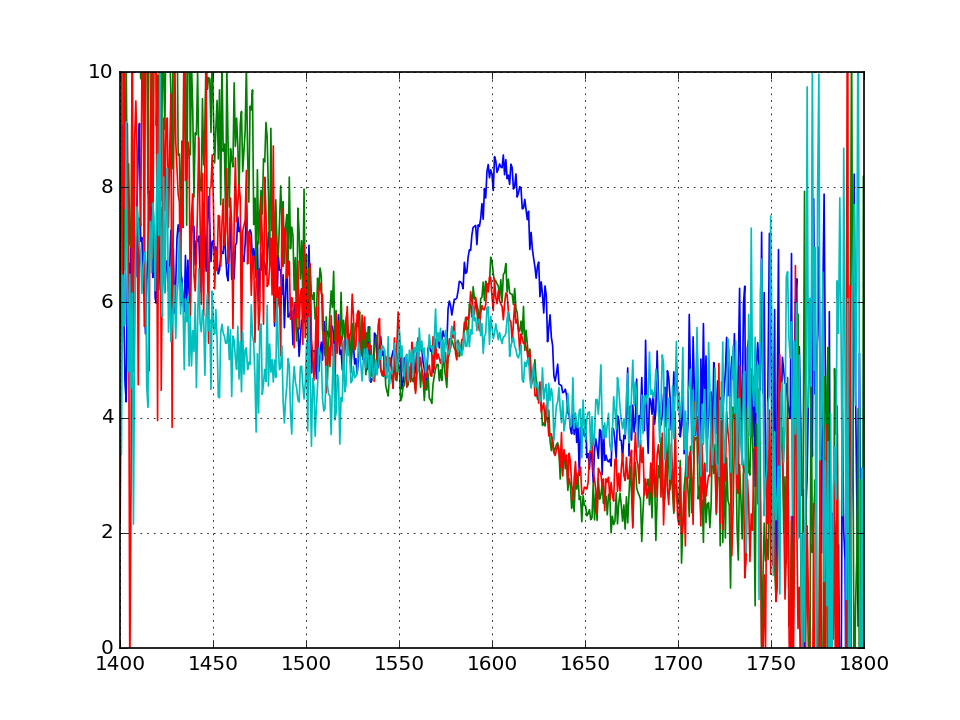

(0, 10)

In [54]:
fig, ax = subplots()

plot(urea8m.df.normalized * 1000)
plot(urea7m.df.normalized * 1000)
plot(urea6m.df.normalized * 1000)
plot(urea4m.df.normalized * 1000)

xlim(1400, 1800)
ylim(0, 10)